In [ ]:
# cut the silence files into small (99x13 files) and put them into an order called silence
os.makedirs('../data/train/audio/silence')

# silence files are in '../data/train/audio/_background_noise_'
# split into 99x13 arrays ( 1 second audio)

from pydub import AudioSegment

noise_folder = '../data/train/audio/_background_noise_'

# limit the noise to white pink 

for (dirpath, dirnames, filenames) in os.walk(noise_folder):
    for f in filenames:
        if f.endswith('wav'):
            #files.append(f)

            for index in range(60):
                
                start = (index) * 1000
                stop = (index+1) * 1000

                
                subset = AudioSegment.from_wav("%s/%s" %(noise_folder,f))
                subset = subset[start:stop]
                subset.export('../data/train/audio/silence/%s%s.wav' %(f,index), format="wav") 
            


In [1]:
def pitch(data,sr,shiftstep = 0):
    input_length = 16000
    data = librosa.effects.pitch_shift(data,sr,shiftstep)
    if len(data)>input_length:
        data = data[:input_length]
    else:
        data = np.pad(data, (0, max(0, input_length - len(data))), "constant")
    return data

In [2]:
from python_speech_features import mfcc
from python_speech_features import logfbank
import scipy.io.wavfile as wav
import librosa
import IPython.display as ipd


def getAudioFeatures_mcff(audiofilepath, features = 'mfcc'):
    (rate,sig) = wav.read(audiofilepath)
    if features == 'mfcc':
        return mfcc(sig,rate, nfft=551)
    if features == 'logfbank':
        return logfbank(sig,rate, nfft=551)
    

In [3]:
test_1 = getAudioFeatures_mcff( '../data/train/audio/dog/3b8406c0_nohash_0.wav_highpitch.wav')
test_2 = getAudioFeatures_mcff( '../data/train/audio/dog/3b8406c0_nohash_0.wav_lowpitch.wav')
test_3 = getAudioFeatures_mcff( '../data/train/audio/dog/3b8406c0_nohash_0.wav')

In [20]:
ipd.Audio('../data/train/audio/dog/3a182c98_nohash_0.wav')

In [10]:
ipd.Audio('../data/train/audio/dog')

ValueError: could not convert string to float: '../data/train/audio/dog5f8e50a0_nohash_0.wav'

In [1]:
def pitch_n_roll(data,sr,pitch_change = 0, roll = 1,stretch_rate= 1):
    # conversion from int to float 

        data = (data/maxv)
    
        input_length = 16000
        data = librosa.effects.pitch_shift(data,16000,pitch_change)
        
        data = librosa.effects.time_stretch(data,stretch_rate)
    
    
    # just in case some padding
        if len(data)>input_length:
            data = data[:input_length]
        else:
            data = np.pad(data, (0, max(0, input_length - len(data))), "constant")
    
        data = np.roll(data, roll)
    
        return (data*maxv).astype(np.int16)


In [2]:
import os
import librosa
import numpy as np
import scipy.io.wavfile as wav
import soundfile as sf
import wave
import random
train_folder = '../data/train/audio/'

count = 0

maxcount = 2
maxv = np.iinfo(np.int16).max

for (dirpath, dirnames, filenames) in os.walk(train_folder):
    #if count < maxcount:
        for dirs in dirnames:
            count +=1
            for (dirpath, dirnames, filenames) in os.walk('../data/train/audio/' + str(dirs)):
            
                for files in filenames:
                
                    if files.endswith('0.wav') or files.endswith('1.wav') or files.endswith('3.wav') or files.endswith('plica.wav')  :
                        #try:
                        
                            audiofilepath = '../data/train/audio/%s/%s' %(dirs,files)
                            rate,data = wav.read(audiofilepath)
                            #data, samplerate = sf.read(, dtype='float32')
                            
                            
                            for rand in range(6):
                                pitch = random.randint(-3,3)
                                roll = random.randint(-1500,1500)
                                speed = random.uniform(0.77,1.33)
                                
                                dat = pitch_n_roll(data,rate,pitch,roll,speed)
                                
                                wav.write(filename='../data/train/audio/%s/%s_%s%s%s.wav' %(dirs,files,pitch,roll,speed), data=dat,rate=16000)
                            

KeyboardInterrupt: 

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 3)

In [ ]:
rate,sig = sf.read('../data/train/audio/%s/%s' %(str(dirs),files), dtype='float32' )

In [4]:
def load_audio_file(file_path):
    input_length = 16000
    data = librosa.core.load(file_path, dtype='float32')[0] #, sr=16000
    if len(data)>input_length:
        data = data[:input_length]
    else:
        data = np.pad(data, (0, max(0, input_length - len(data))), "constant")
    return data


def plot_time_series(data):
    fig = plt.figure(figsize=(14, 8))
    plt.title('Raw wave ')
    plt.ylabel('Amplitude')
    plt.plot(np.linspace(0, 1, len(data)), data)
    plt.show()



In [14]:
data_1 = load_audio_file('../data/train/audio/dog/3b8406c0_nohash_0.wav_highpitch.wav')
data_2 = load_audio_file('../data/train/audio/dog/3b8406c0_nohash_0.wav')

NoBackendError: 

In [ ]:
# make new fake noise data
maxv = np.iinfo(np.int16).max
librosa.output.write_wav(
    "out_int16.wav", (audio * maxv).astype(np.int16), rate
)


In [16]:
import numpy as np
import librosa

rate = 16000
data = np.random.randn(rate * 10, 2)

maxv = np.iinfo(np.int16).max
librosa.output.write_wav(
    "fake_whitenoise.wav", (audio * maxv).astype(np.int16), rate
)


NameError: name 'audio' is not defined

In [22]:
scipy.io.wavfile.write('/tmp/white_noise.wav', 16000, np.array(((acoustics.generator.noise(16000*60, color='white'))/3) * 1).astype(np.int16))
scipy.io.wavfile.write('/tmp/pink_noise.wav', 16000, np.array(((acoustics.generator.noise(16000*60, color='pink'))/3) * 1).astype(np.int16))


yes
yes


In [37]:
rate = 16000
import random
# Write out audio as 24bit PCM WAV
#sf.write('fake_whitenoise.wav', data, samplerate)
many = 100


from python_speech_features import mfcc

for f in range(20):
    data = np.random.randn(rate * 1, 1)
    print(mfcc(data,rate).shape)
    

(99, 13)
(99, 13)
(99, 13)
(99, 13)
(99, 13)
(99, 13)
(99, 13)
(99, 13)
(99, 13)
(99, 13)
(99, 13)
(99, 13)
(99, 13)
(99, 13)
(99, 13)
(99, 13)
(99, 13)
(99, 13)
(99, 13)
(99, 13)


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_time_series(data):
    fig = plt.figure(figsize=(14, 8))
    plt.title('Raw wave ')
    plt.ylabel('Amplitude')
    plt.plot(np.linspace(0, 1, len(data)), data)
    plt.show()
    

In [7]:
# generator for silence, 
# take the first 1/10th of all files, and resample them to silence files

In [31]:
audiofilepath = '../data/train/audio/bird/00b01445_nohash_0.wav'
rate,data = wav.read(audiofilepath)


In [32]:
print(data[:100])

[ -246  1525   669 -1449   150  -273 -1562  -424   979   918  -100  1297
  1663 -1643  -677  1639 -1323 -1239  1669  -443 -1446  2272  1872 -1864
 -1378   451    50  -607   713   643 -1598   655  2075 -1212 -1650   -27
   151  -300   636  1016   388   511  -658  -835   886   213 -1345   781
   761 -1620  1061  1277 -2125   133  1935  -654  -562   129  -405   333
   -36  -379   756  -386  -727   507  -573     7   556 -1019   279  1513
 -1099  -411  1058 -1543  -350  1486    40  -567  -315   -66  1101  1057
 -1564  -622   784 -1010   122  1276   191  -668 -1035   286   459  -652
  -486   300  1385   765]


In [52]:
basicnoise = data[:3500]

In [2]:
def resample_beginning_of_file_for_full_silence_samples(data, depth):
    """ recreates 16000 datapoints by resampling a silent subset of another sample """

    basic = data[:depth]
    #newnoise = []
    #for element in range(16000):
    #    newnoise.append(random.choice(basic))
        
    
    return np.random.choice(basic,16000,replace=True)

def resample_snippets(data,depth= 2000):
    basic = data[:depth]
    #outfile = np.ndarray()
    for repeat in range(3):
        basic = np.hstack((basic,basic))
    return basic
        
    
    



In [87]:
audiofilepath = '../data/train/audio/bird/00b01445_nohash_0.wav'
rate,data = wav.read(audiofilepath)

dat = resample_beginning_of_file_for_full_silence_samples(data,3000)



In [118]:
audiofilepath = '../data/train/audio/no/026290a7_nohash_0.wav'
rate,data = wav.read(audiofilepath)


In [128]:
dat = resample_snippets(data)

In [1]:
def write_to_file(data,name,depth,repeats):
    snp = resample_snippets(data)
    wav.write(filename='../data/train/audio/silence/%s.reshuffled_snippets.wav' %(name), data=snp,rate=16000)
    
    for f in range(repeats):
        dat = resample_beginning_of_file_for_full_silence_samples(data,4400)
        wav.write(filename='../data/train/audio/silence/%s_0_%s.wav' %(name,f), data=dat,rate=16000)

In [90]:
audiofilepath = '../data/train/audio/no/026290a7_nohash_0.wav'
rate,data = wav.read(audiofilepath)


In [135]:



for (dirpath, dirnames, filenames) in os.walk('../data/train/audio/no/') :
            
    for files in filenames:
                
            if files.endswith('0.wav'):
                
                audiofilepath = '../data/train/audio/no/%s' %(files)
                rate,data = wav.read(audiofilepath)
                write_to_file(data,files,2000,10)
                
                        #try:
                        

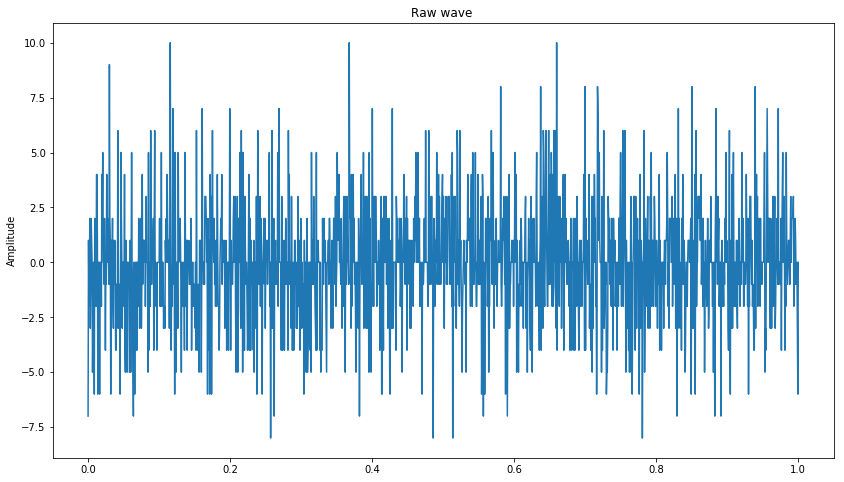

In [55]:
plot_time_series(newnoise)

In [23]:
ipd.Audio(audiofilepath)

In [114]:
audiofilepath = '../data/train/audio/no/026290a7_nohash_0.wav'
rate,data = wav.read(audiofilepath)


In [115]:
print(data[0:200])

[ 35  61  41  62  82  74  69  50  92 134 139 159 162 120 102 111  87  78
  34  74 119  81 112  83  70  87  72  82  91  96  71  68  52  39  86 118
 113 135  93  72  95  81  82  84 110 107 103 128  97  61  79  84  94 109
  58 105 138  99 134  86 117 134 101 123  88  81  94 110  88  83 117 107
 109 127 123 121 119 120 120 142 183 157 167 169 144 162 137 180 187 170
 189 192 226 250 217 198 216 207 206 182 150 168 175  99 119 155 138 164
 141 151 158 131 167 151 184 181 141 194 147 154 154 151 165 147 192 165
 146 152 113 104 101  82  87 128 152 166 144 123 160 166 145  91  27  15
  25   7   1  -4  12  -2 -23  14  49  70  35  61  87  87 130 104  86  77
  88 117  45  31  35  27  35  19  67  67  71  76  66  57  61 100  59  59
  30 -17  20   4 -17 -14 -64 -37 -33 -56  -3 -22 -21 -24 -38 -25 -55 -70
 -28 -18]


In [116]:
ipd.Audio(audiofilepath)

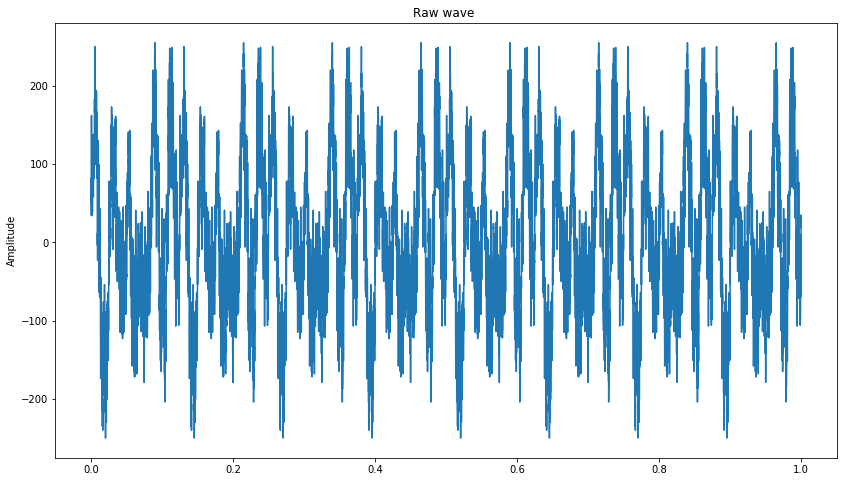

In [130]:
plot_time_series(dat)

In [ ]:
# lets make 100 lownoise (+- 10)  and 100 midnoise (+- 300) files files

In [ ]:
import wave
import random
train_folder = '../data/train/audio/'

count = 0

maxcount = 2
maxv = np.iinfo(np.int16).max

for (dirpath, dirnames, filenames) in os.walk(train_folder):
    #if count < maxcount:
        for dirs in dirnames:
            count +=1
            for (dirpath, dirnames, filenames) in os.walk('../data/train/audio/' + str(dirs)):
            
                for files in filenames:
                
                    if files.endswith('0.wav'):
                        #try:
                        
                            audiofilepath = '../data/train/audio/%s/%s' %(dirs,files)
                            rate,data = wav.read(audiofilepath)
                            #data, samplerate = sf.read(, dtype='float32')
                            
                            lowdat = pitch_n_roll(data,rate,-4,random.randint(-1500,1500))
                            highdat = pitch_n_roll(data,rate,4,random.randint(-1500,1500))
                            
                            #lowerdat = pitch_n_roll(data,rate,-3, random.randint(-1000,1000))
                            #higherdat = pitch_n_roll(data,rate,3, random.randint(-1000,1000))
                            
                            #lowdat = pitch_n_roll(data,rate,-1, random.randint(-1000,1000))
                            #highdat = pitch_n_roll(data,rate,1, random.randint(-1000,1000))
                            #print(mfcc(data,input_length).shape,mfcc(lowdat,input_length).shape,mfcc(highdat,input_length).shape)
                            
                            
                            #wav.write(filename='../data/train/audio/%s/%s_lowpitch.wav' %(dirs,files), data=lowerdat,rate=rate)
                            #wav.write(filename='../data/train/audio/%s/%s_medlowpitch.wav' %(dirs,files), data=lowdat,rate=rate)
                            #wav.write(filename='../data/train/audio/%s/%s_medhighpitch.wav' %(dirs,files), data=highdat,rate=rate)
                            #wav.write(filename='../data/train/audio/%s/%s_highpitch.wav' %(dirs,files), data=higherdat,rate=rate)
                            wav.write(filename='../data/train/audio/%s/%s_vlowpitch.wav' %(dirs,files), data=lowdat,rate=rate)
                            wav.write(filename='../data/train/audio/%s/%s_vhighpitch.wav' %(dirs,files), data=highdat,rate=rate)

In [17]:
import scipy.io.wavfile as wav
import numpy as np
from python_speech_features import mfcc
from python_speech_features import logfbank
import scipy.io.wavfile as wav
import librosa
import IPython.display as ipd


In [ ]:
# try cutting the relevent parts out of the sequences

In [48]:
audiofilepath = '../data/train/audio/right/0474c92a_nohash_1.wav_medhighpitch.wav'
rate,data = wav.read(audiofilepath)

In [49]:
ipd.Audio(audiofilepath)

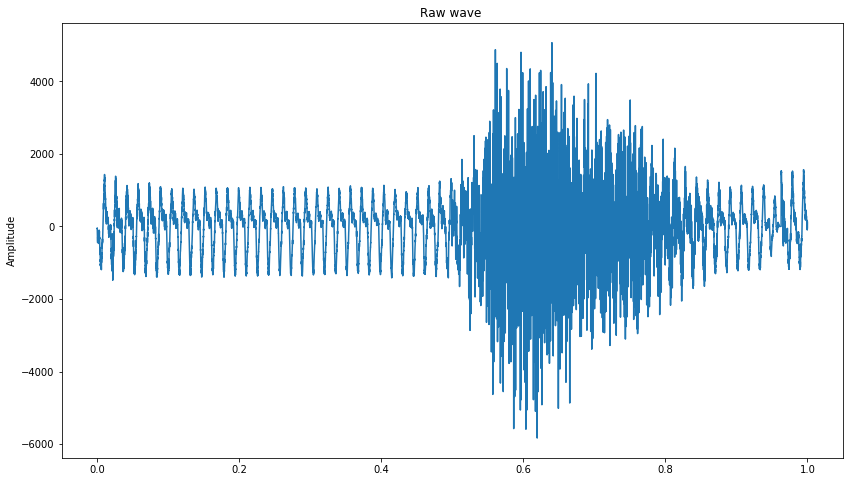

In [50]:
plot_time_series(data)

In [75]:
def normalize_minmax(element,amp,max_val,min_val):
    """normalize values to x/(xmaxormin) * amp and"""
    

    if(element > 0):
        element = int(float(element)/float(max_val) * float(amp))
    if(element < 0):
        element = -1*(int(float(element)/float(min_val) * float(amp)))

    return element
        
normalize_minmax_vectorized = np.vectorize(normalize_minmax)       

In [64]:
def normalize_array_to_minmax(one_darray,amp):
    """normalize values to x/(xmaxormin) * amp and"""
    
    max_val = np.max(one_darray)
    min_val = np.min(one_darray)
    
    
    for element in one_darray:
        if(element > 0):
            element = int(float(element)/float(max_val) * float(amp))
        if(element < 0):
            element = -1*(int(float(element)/float(min_val) * float(amp)))

    return one_darray
        
        
        

        #print(np.min(one_darray))
    
    
    

In [76]:


print(normalize_minmax_vectorized(data,5000,max_val,min_val))

[ -48  -36 -110 ...,   45  133  -34]


In [66]:
print(data)

[ -56  -42 -129 ...,   46  135  -40]


In [113]:
def find_index_of_val(one_darray,value):
    index = 0
    
    for element in one_darray:
        if element == value:
            return index
        index +=1
    
def find_center(one_darray,highpoint,lowpoint):
    return int(np.mean([find_index_of_val(one_darray,highpoint),find_index_of_val(one_darray, lowpoint)]))
    

def cut_and_normalize_array(one_darray, highint=8000):
    """ cut before and after the highest/ lowest peak   """
    max_val = np.max(one_darray)
    min_val = np.min(one_darray)
        
    # buffer the array with 1500 upstream and 2500 downstream noise
    
    one_darray = np.hstack((np.zeros(2000), one_darray,np.zeros(3000)))
    
    center = find_center(one_darray,max_val,min_val)
    
    one_darray = normalize_minmax_vectorized(one_darray,highint,max_val,min_val)
    # hardcode the array
    
    return one_darray[(center-2000):(center+3000)]
    
    #print(center,"  ",normalize_minmax_vectorized(one_darray,highint,max_val,min_val))
    
            
    
    
    

In [108]:
# highfreq 	highest band edge of mel filters. In Hz, default is samplerate/2   = 8000
cut_and_normalize_array(data,8000)

array([ 1341.,   935.,   810., ...,  -687.,  -594.,   -19.])

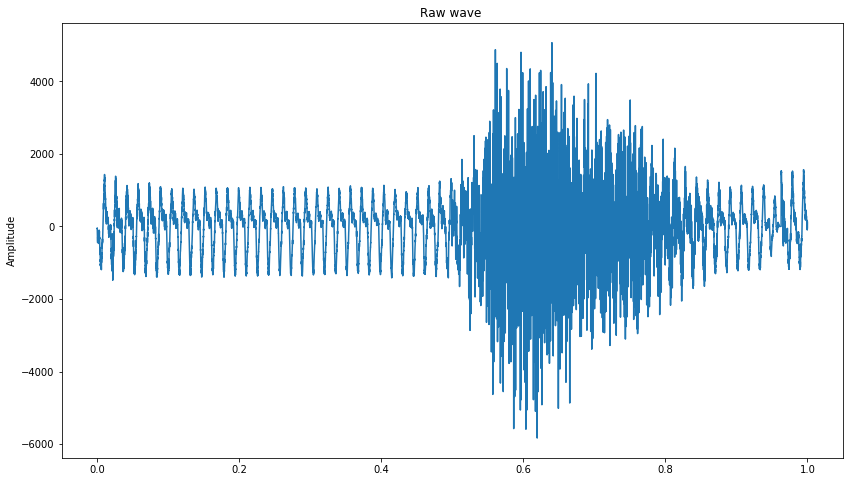

In [95]:
plot_time_series(data)

In [101]:
cut_and_normalize_array(data,5000)

array([ 849.,  592.,  513., ..., -501., -433.,  -14.])

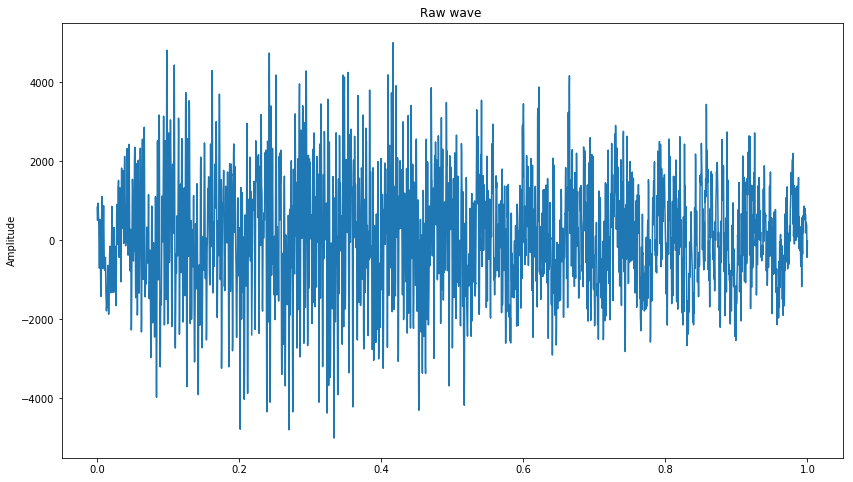

In [109]:
plot_time_series(cut_and_normalize_array(data,5000))

In [110]:
wav.write(filename='testcut.wav', data= np.ndarray.astype(cut_and_normalize_array(data,5000),np.int16),rate=rate)

In [111]:
ipd.Audio('testcut.wav')

In [112]:
rate,data = wav.read('../data/train/audio/bird/00b01445_nohash_0.wav')
rate,datalow = wav.read('../data/train/audio/bird/00b01445_nohash_0.wav_highpitch.wav')
rate,datahigh = wav.read('../data/train/audio/bird/00b01445_nohash_0.wav_vhighpitch.wav')
rate,datamed = wav.read('../data/train/audio/bird/00b01445_nohash_0.wav_medhighpitch.wav')

In [114]:
a = cut_and_normalize_array(data)
b = cut_and_normalize_array(datalow)
c = cut_and_normalize_array(datahigh)
d = cut_and_normalize_array(datamed)


In [104]:
# lets transform all files to a new set of folders
# ignore silence, deal with that seperately

In [122]:


import os

In [125]:
moddir = '../data/mod/train/audio/'
train_folder = '../data/train/audio/'

for (dirpath, dirnames, filenames) in os.walk(train_folder):
    #if count < maxcount:
        for dirs in dirnames:
            for (dirpath, dirnames, filenames) in os.walk('../data/train/audio/' + str(dirs)):
                
                if not os.path.exists(moddir + dirs):
                    os.makedirs(moddir + dirs)
            
                for files in filenames:
                
                    if files.endswith('.wav'):
                        #try:
                        
                            audiofilepath = '%s%s/%s' %(train_folder,dirs,files)
                            rate,data = wav.read(audiofilepath)

                            wav.write(filename='%s%s/%s_vlowpitch.wav' %(moddir,dirs,files), 
                                      data=np.ndarray.astype(cut_and_normalize_array(data),np.int16),
                                      rate=rate)
                           

/home/ethur/anaconda2/envs/deeplearning/lib/python3.6/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [131]:
# the same for the test files
moddir = '../data/mod/test/audio/'
train_folder = '../data/test/audio'


In [135]:

for (dirpath, dirnames, filenames) in os.walk(train_folder):

    for f in filenames:
        if f.endswith('.wav'):

            audiofilepath = '%s/%s' %(train_folder,f)
            rate,data = wav.read(audiofilepath)

            wav.write(filename='%s%s' %(moddir,f), 
                        data=np.ndarray.astype(cut_and_normalize_array(data),np.int16),
                        rate=rate)
    

In [140]:
# brokenfiles:lo

location = '../data/test/audio/clip_0018489ca.wav'
modloc = '../data/mod/test/audio/clip_0018489ca.wav'

In [139]:
rate,data = wav.read(location)

In [141]:
wav.write(filename=modloc, 
                        data=np.ndarray.astype(cut_and_normalize_array(data),np.int16),
                        rate=rate)

In [1]:
import os
import librosa
import numpy as np
import scipy.io.wavfile as wav
import soundfile as sf
import wave
import random
train_folder = '../data/train/audio/'

count = 0

maxcount = 2
maxv = np.iinfo(np.int16).max

for (dirpath, dirnames, filenames) in os.walk(train_folder):
    #if count < maxcount:
        for dirs in dirnames:
            count +=1
            for (dirpath, dirnames, filenames) in os.walk('../data/train/audio/' + str(dirs)):
            
                for files in filenames:
                
                    if files.endswith('_replica.wav'):
                        #try:
                        
                            audiofilepath = '../data/train/audio/%s/%s' %(dirs,files)
                            rate,data = wav.read(audiofilepath)
                            #data, samplerate = sf.read(, dtype='float32')
                            
                            
                            for rand in range(6):
                                pitch = random.randint(-5,5)
                                roll = random.randint(-1500,1500)
                                speed = random.uniform(0.77,1.33)
                                
                                dat = pitch_n_roll(data,rate,pitch,roll,speed)
                                
                                wav.write(filename='../data/train/audio/%s/%s_%s%s%s.wav' %(dirs,files,pitch,roll,speed), data=dat,rate=16000)
                            

NameError: name 'pitch_n_roll' is not defined